!["big cnn loss"](/home/nirmal/course_work/DLRG/nirmal/assignment_3/data/graphs/big_cnn_loss_step.png)
!["big cnn val acc"](/home/nirmal/course_work/DLRG/nirmal/assignment_3/data/graphs/val_big_cnn_acc.png)
!["big cnn val loss"](/home/nirmal/course_work/DLRG/nirmal/assignment_3/data/graphs/val_big_cnn_loss.png)

!["little cnn loss"](/home/nirmal/course_work/DLRG/nirmal/assignment_3/data/graphs/little_cnn_loss.png)
!["val little cnn loss"](/home/nirmal/course_work/DLRG/nirmal/assignment_3/data/graphs/val_little_cnn_loss.png)
!["val little cnn acc"](/home/nirmal/course_work/DLRG/nirmal/assignment_3/data/graphs/val_little_cnn_acc.png)


!["mlp training loss"](/home/nirmal/course_work/DLRG/nirmal/assignment_3/data/graphs/mlp_loss.png)
!["val mlp loss"](/home/nirmal/course_work/DLRG/nirmal/assignment_3/data/graphs/val_mlp_loss.png)
!["val mlp acc"](/home/nirmal/course_work/DLRG/nirmal/assignment_3/data/graphs/val_mlp_acc.png)


In [ ]:
# load a pretrained model using pytorch lightning

import pytorch_lightning as pl
import torch
from torchvision import datasets, transforms

b = torch.load('big_cnn.pt')
l = torch.load('little_cnn.pt')
m = torch.load('mlp.pt')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_set = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_set = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True, num_workers=16)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False, num_workers=16)



def test_model(m):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = m(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {}%'.format(100 * correct / total))

test_model(b)
test_model(l)
test_model(m)


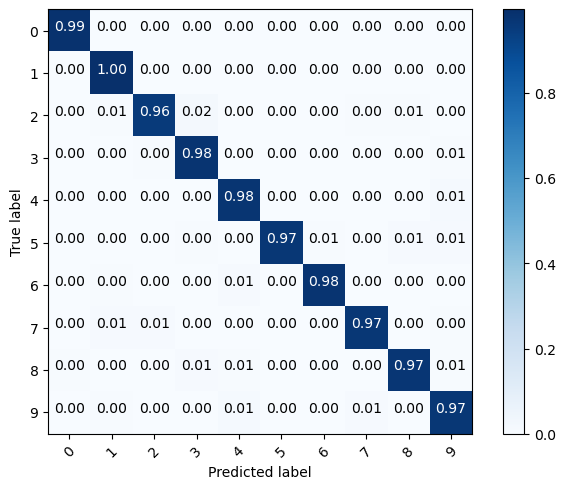

In [18]:
# Create a confusion matrix on the results.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):
    """
    This function plots a confusion matrix using the given true labels and predicted labels.
    """

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize the confusion matrix
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Print the values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = m(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels)
        y_pred.extend(predicted)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

plot_confusion_matrix(y_true, y_pred, np.array([0,1,2,3,4,5,6,7,8,9]))
plt.title('Confusion Matrix for MLP')